# CS496 UGP 1

# Designer Co-pilot: Reimagining Workplace Design with AI

*Jiyanshu Dhaka*
*(220481)*



# *Abstract:*
Our project focuses on **designing workspaces** by developing an AI-powered
Designer Co-pilot that transitions traditional design tools into
intelligent collaborators. We follow the **grid philosophy**, using structure
layouts and spatial constraints to create efficient and organized workspace
environments. At the core of this approach is the use of Integer Linear
Programming (**ILP**) and different **sampling methods** to produce the layouts
which best fits all the user-given constraints. The Co-pilot utilizes
data-driven intelligence and generative abilities to actively participate
in **layout planning, compliance testing and decision making**. This
integration improves efficiency, saves human labor hours, and produces
responsive, user-specific workspace solutions.


----
# Grid Based Philosophy

It is bit complex to directly start interior designing of a random shaped floor with building constraints like shell shape, core areas, structural elements etc.

so we start with simple grid-based philosophy. we take rectangular grid of custom dimensions and populate it with red, green, and blue tiles.

**each tile color represents a functional or spatial component** and they are subjected to specific use defined constraints.

we generate feasible grid configurations / samples that satisfy **user defined custom constraints** through **optimization of corresponding objective function.**

------

# General Integer Linear Programming Setting

**ILP** is mathematical optimization program in which some or all of the variables are restricted to be integers.

In many settings the **objective function and the constraints** (other than integer constraints) are **linear**.

Integer programming is **NP-complete**. a problem is NP-complete when it is a decision problem, meaning that output is either **yes** or **no**.


When the **feasible region defined by the constraints** has a positive area (i.e., there is at least one feasible solution/point within the region), the answer is **yes**—we can determine feasible samples or solutions. Otherwise, if the answer is **no**, the problem ends there, and we simply return "no feasible solution" and request the user to **loosen the constraints**.

If some decision variables are not discrete, the problem becomes a **mixed-integer programming** problem.  
First, we check if the given number of red, green, and blue color cells can be arranged to fit within a square grid with linear constraints.  
Let R, G, and B be the number of red, green, and blue tiles, respectively.

R + G + B = grid size (length × breadth)

The user can input custom linear constraints of the form:  
**aR + bG + cB ≤ d**

ILP cannonical form is :

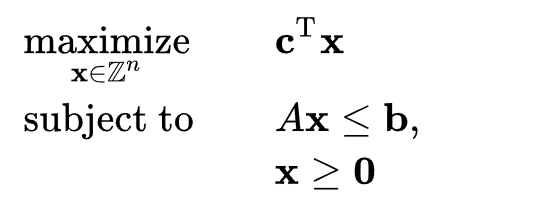

------
so, we use integer linear programming to check if it is possible to satisfy the custom defined user constraints. lets take an illustration:

In [ ]:
from scipy.optimize import linprog

def can_fit_colors():
    """
    Check if the given [R, G, B] can fit into a square grid with constraints.

    Returns:
        str: 'YES' if the configuration is possible, otherwise 'NO'.
    """
    # Take inputs for the grid size and color counts
    grid_size = int(input("Enter the dimension of the square grid: "))
    R, G, B = map(int, input("Enter the counts of R, G, B (space-separated): ").replace(',', ' ').split())

    total_cells = grid_size ** 2

    # Ensure the total matches the grid size
    if R + G + B != total_cells:
        return "NO: The sum of R, G, and B does not equal the total grid cells."

    print("Define constraints:")
    print("1. Total cells constraint: R + G + B must equal total_cells.")
    print("2. Custom constraints must be of the form 'a b c d' for aR + bG + cB <= d.")

    custom_constraints = input("Do you want to add custom constraints? (yes/no): ").strip().lower()

    # Prepare the objective function (dummy since we're only checking feasibility)
    c = [0, 0, 0]  # Coefficients for R, G, B

    # Inequality constraints (Ax <= b)
    A_ub = []
    b_ub = []

    if custom_constraints == "yes":
        while True:
            constraint = input("Enter a custom constraint as 'a b c d' (or 'done' to finish): ").strip()
            if constraint.lower() == "done":
                break
            try:
                a, b, c_value, d = map(int, constraint.split())
                # Store coefficients in the correct order for the inequality
                A_ub.append([a, b, c_value])
                b_ub.append(d)
            except Exception as e:
                print(f"Error in constraint: {e}. Please enter in 'a b c d' format.")

    # Convert lists to numpy arrays if they're not empty
    A_ub = A_ub if A_ub else []  # Use an empty list if no constraints
    b_ub = b_ub if b_ub else []  # Use an empty list if no constraints

    # Variable bounds for R, G, B
    bounds = [(0, R), (0, G), (0, B)]

    # Equality constraint for total cells
    A_eq = [[1, 1, 1]]  # R + G + B = total_cells
    b_eq = [total_cells]

    try:
        # Solve the linear programming problem
        res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

        # Check if a feasible solution exists
        if res.success:
            return "YES"
        else:
            return "NO"
    except Exception as e:
        return f"An error occurred during linear programming: {e}"

# Example usage
if __name__ == "__main__":
    result = can_fit_colors()
    print(result)

Enter the dimension of the square grid: 10
Enter the counts of R, G, B (space-separated): 20 20 60
Define constraints:
1. Total cells constraint: R + G + B must equal total_cells.
2. Custom constraints must be of the form 'a b c d' for aR + bG + cB <= d.
Do you want to add custom constraints? (yes/no): yes
Enter a custom constraint as 'a b c d' (or 'done' to finish): 1 1 1 2000
Enter a custom constraint as 'a b c d' (or 'done' to finish): 3 4 5 100
Enter a custom constraint as 'a b c d' (or 'done' to finish): 3 3  3 1000
Enter a custom constraint as 'a b c d' (or 'done' to finish): done
NO


Here for this particular set of linear constraints, the solution was not feasible as the **generalised inverse of constarint coefficient matrix** **A** was not possible.

--------

.








.












.


















.















.













.

#Single Constraints


---

**ILP** is a general method used to solve problems **if** we are able to express the constraints as linear equations. However, these linear constraints are **not always provided directly** by the user, as users might not be familiar with how their logical or geometric conditions can be translated into mathematical form.

Instead, users often describe their constraints in **logical** terms (such as adjacency, patterns, etc.) or **geometrical** terms (such as periphery, diagonal positioning, etc.).  

Our task, then, is to interpret these higher-level user constraints and reduce them to formal linear inequalities or equations that an ILP solver can handle.

Now, we solve for **specific constraints**

.










.



















.
































.

































.






















.


# Periphery constraint

if user wants to fill the colours in the periphery with a priority order (e.g. R G , meaning R is filled in periphery with highest priority then Green and then remaining)



Variable and notation for understanding:




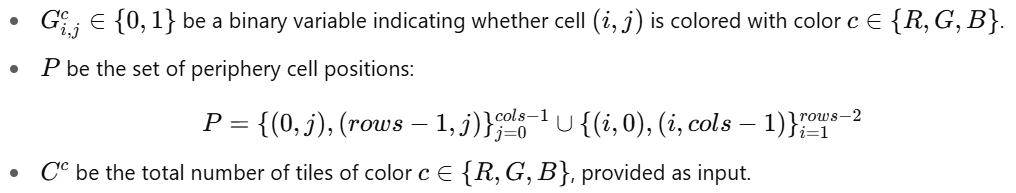



Appart from the default sanity check: R+G+B = grid size
we have to Assign Periphery Color Priority:

let


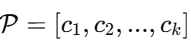




be the list of priority of colors for the periphery as given in periphery_colors.

We try to assign colors
c1,c2,...,to the periphery positions first.

we apply layer of constraints:

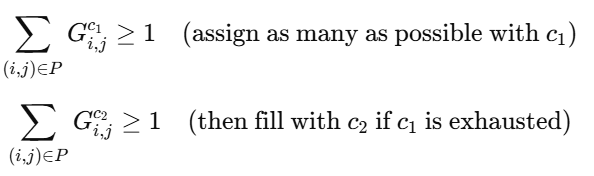

here P is periphery not the priority list

we can maximize number of periphery tiles assigned to higher-priority colors by assigning more weights to them in the objective function:




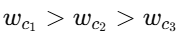


# Objective Function




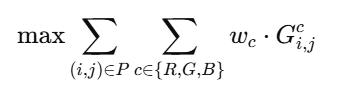

In [ ]:
import sys
import random

def fill_grid(rows, cols, red, green, blue, periphery_colors):
    total_tiles = rows * cols

    if red + green + blue != total_tiles:
        print(f"Invalid input! The total number of tiles ({red + green + blue}) must be equal to {total_tiles}.")
        sys.exit(1)

    # Initialize the grid with None
    grid = [[None] * cols for _ in range(rows)]
    color_counts = {'R': red, 'G': green, 'B': blue}

    # Define periphery positions
    periphery_positions = [(0, j) for j in range(cols)] + [(rows - 1, j) for j in range(cols)] + \
                          [(i, 0) for i in range(1, rows - 1)] + [(i, cols - 1) for i in range(1, rows - 1)]

    # Shuffle periphery positions to make selection random
    random.shuffle(periphery_positions)

    # Assign periphery colors in the order given by the user
    for color in periphery_colors:
        for i, j in periphery_positions:
            if grid[i][j] is None and color_counts[color] > 0:
                grid[i][j] = color
                color_counts[color] -= 1

    # Fill remaining periphery positions with available colors
    for i, j in periphery_positions:
        if grid[i][j] is None:
            available_colors = [color for color in 'RGB' if color_counts[color] > 0]
            if available_colors:
                chosen_color = random.choice(available_colors)
                grid[i][j] = chosen_color
                color_counts[chosen_color] -= 1

    # Collect empty positions
    empty_positions = [(i, j) for i in range(rows) for j in range(cols) if grid[i][j] is None]
    random.shuffle(empty_positions)  # Shuffle the empty positions

    # Fill the shuffled empty positions with available colors
    for i, j in empty_positions:
        available_colors = [color for color in 'RGB' if color_counts[color] > 0]
        if available_colors:
            chosen_color = random.choice(available_colors)
            grid[i][j] = chosen_color
            color_counts[chosen_color] -= 1

    return grid

# Input handling
rows = int(input("Enter the number of rows: "))
cols = int(input("Enter the number of columns: "))
red = int(input("Enter the number of red tiles: "))
green = int(input("Enter the number of green tiles: "))
blue = int(input("Enter the number of blue tiles: "))
periphery_colors = input("Enter the colors for the periphery in order (R/G/B, e.g., R B G): ").strip().upper().split()

# Generate grid
grid = fill_grid(rows, cols, red, green, blue, periphery_colors)

# Print the grid
if grid:
    for row in grid:
        print(" ".join(cell if cell is not None else '-' for cell in row))

Enter the number of rows: 6
Enter the number of columns: 8
Enter the number of red tiles: 15
Enter the number of green tiles: 21
Enter the number of blue tiles: 12
Enter the colors for the periphery in order (R/G/B, e.g., R B G): R G
G R R G R R R G
G G G B G B B G
R B B G G G B R
G B B B G B B R
R G B G G G G G
R R R R G G R R


here we can see the colours are filled according to their priority in the periphery.





Tile Count Constraint ensures exact utilization of input tiles.

Uniqueness Constraint guarantees no tile is assigned more than one color.

Periphery Coloring Constraint prioritizes certain colors at the periphery, simulating a design preference (e.g., boundary in red).


.










.



















.
































.

































.






















.

# Diagonal Constraint:



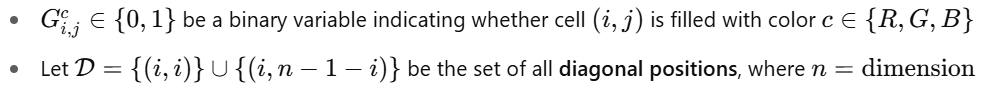











for a given priority list P we again define more weights to the


layer of constraints will be prefering c1 over c2, c2  over  c3 and so on


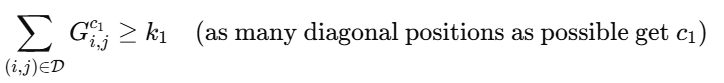

















We want to prefer assigning
c1, then
c2
​
 , then
c3 to the diagonal positions.

To encode this preference as a soft constraint we define weights:




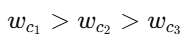





# Objective function:



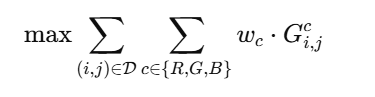











In [ ]:
import random

def fill_grid(dimension, red, green, blue, diagonal_colors):
    total_cells = dimension * dimension
    total_colors = red + green + blue

    if total_colors != total_cells:
        print(f"Error: Incorrect number of colors. Need exactly {total_cells}, but have {total_colors}.")
        return

    grid = [[None] * dimension for _ in range(dimension)]
    color_counts = {'R': red, 'G': green, 'B': blue}

    # Get all diagonal positions (both main diagonal and anti-diagonal)
    main_diagonal = [(i, i) for i in range(dimension)]
    anti_diagonal = [(i, dimension - 1 - i) for i in range(dimension)]

    # Remove duplicates (center cell in odd-sized grids)
    all_diagonal_positions = []
    for pos in main_diagonal + anti_diagonal:
        if pos not in all_diagonal_positions:
            all_diagonal_positions.append(pos)

    random.shuffle(all_diagonal_positions)

    # First, try to fill all diagonal positions according to priority order
    for i, j in all_diagonal_positions:
        filled = False
        for priority_color in diagonal_colors:
            if color_counts[priority_color] > 0:
                grid[i][j] = priority_color
                color_counts[priority_color] -= 1
                filled = True
                break

    # Fill remaining empty positions
    empty_positions = [(i, j) for i in range(dimension) for j in range(dimension) if grid[i][j] is None]
    random.shuffle(empty_positions)

    for i, j in empty_positions:
        available_colors = [color for color in 'RGB' if color_counts[color] > 0]
        if available_colors:
            chosen_color = random.choice(available_colors)
            grid[i][j] = chosen_color
            color_counts[chosen_color] -= 1

    return grid

# Get user inputs
dimension = int(input("Enter the dimension: "))
red = int(input("Enter the number of red tiles: "))
green = int(input("Enter the number of green tiles: "))
blue = int(input("Enter the number of blue tiles: "))
diagonal_colors = input("Enter the colors for the diagonal in order (R/G/B, e.g., R G B): ").strip().upper().split()

grid = fill_grid(dimension, red, green, blue, diagonal_colors)

if grid:
    for row in grid:
        print(" ".join(row))

Enter the dimension: 5
Enter the number of red tiles: 9
Enter the number of green tiles: 10
Enter the number of blue tiles: 6
Enter the colors for the diagonal in order (R/G/B, e.g., R G B): B R
R G R G B
G R G B G
G R B R G
R B G B G
B G R R R


Diagonal Priority: The most preferred colors appear on the diagonals as much as possible (in order).

Rest of the Grid: Filled greedily with remaining colors, obeying total tile counts.




.
































.














































.
























































.























































.
























.

# **Adjacency Constraint:**
Without loss of generality lets solve Constraint on (Red-Green)


for R and G to be adjacent in grid: we take grid layout to be a graph.

cells are nodes and adjacent cells share an edge.

Binary Variables:

let we define binary variable s.t. x[i,j]^R=0 if (i,j)th cell does not contain red, else 1.


for each cell (i, j) in the grid:

If there is a red cell x[i, j]^R at position (i, j), then at least one of its adjacent cells must be green, represented as:
  - x[i, j+1]^G (right)
  - x[i, j-1]^G (left)
  - x[i-1, j]^G (above)
  - x[i+1, j]^G (below)

if x[i, j]^R ==1, then:  
x[i, j+1]^G + x[i, j-1]^G + x[i-1, j]^G + x[i+1, j]^G >= 1  

so wherever R is in a cell then atleast 1 G is near it and similarly if x[i, j]^G ==1, then:  
x[i, j+1]^R + x[i, j-1]^R + x[i-1, j]^R + x[i+1, j]^R >= 1  

so wherever G is in a cell then atleast 1 R is near it.



# Objective function



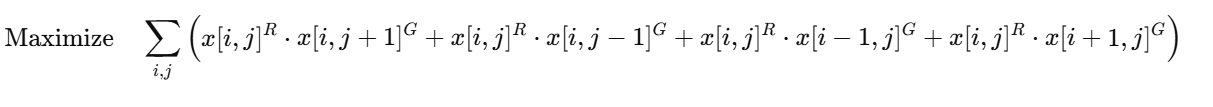

----

Boundary Conditions for sanity check: **checking bounds**:
- Don't access invalid indices like `i-1` if `i=1`.
- For cells on the edge, include only valid neighbors.



In [ ]:
import random

def get_user_input():
    n = int(input("Enter number of rows: "))
    m = int(input("Enter number of columns: "))
    total_cells = n * m

    tile_counts = {}
    tile_counts['R'] = int(input("Enter count of R: "))
    tile_counts['G'] = int(input("Enter count of G: "))
    tile_counts['B'] = int(input("Enter count of B: "))

    if sum(tile_counts.values()) != total_cells:
        print("Error: The sum of R, G, B must equal grid area.")
        return None, None, None

    adjacent_tiles = input("Enter two tiles for constraint (e.g., R G): ").split()
    if len(adjacent_tiles) != 2 or adjacent_tiles[0] not in tile_counts or adjacent_tiles[1] not in tile_counts or adjacent_tiles[0] == adjacent_tiles[1]:
        print("Error: Invalid tile constraint selection.")
        return None, None, None

    return n, m, tile_counts, adjacent_tiles

def count_adjacent_pairs(grid, n, m, adjacent_tiles):
    """Count the total number of adjacent pairs in the final grid."""
    tile1, tile2 = adjacent_tiles
    pair_count = 0

    # Check horizontal adjacencies
    for i in range(n):
        for j in range(m-1):
            if (grid[i][j] == tile1 and grid[i][j+1] == tile2) or \
               (grid[i][j] == tile2 and grid[i][j+1] == tile1):
                pair_count += 1

    # Check vertical adjacencies
    for i in range(n-1):
        for j in range(m):
            if (grid[i][j] == tile1 and grid[i+1][j] == tile2) or \
               (grid[i][j] == tile2 and grid[i+1][j] == tile1):
                pair_count += 1

    return pair_count

def generate_strategic_grid(n, m, tile_counts, adjacent_tiles):
    grid = [[' ' for _ in range(m)] for _ in range(n)]

    tile1, tile2 = adjacent_tiles[0], adjacent_tiles[1]
    if tile_counts[tile1] > tile_counts[tile2]:
        tile1, tile2 = tile2, tile1

    if tile_counts[tile2] > 4 * tile_counts[tile1]:
        print("Error: Not possible to satisfy the constraint.")
        return None, None, None

    placed_tiles = {'R': 0, 'G': 0, 'B': 0}
    adjacent_pairs = 0
    placed_positions = []

    row, col = 1, 1
    while placed_tiles[tile1] < tile_counts[tile1] and placed_tiles[tile2] < tile_counts[tile2]:
        if grid[row][col] == ' ':
            grid[row][col] = tile1
            placed_tiles[tile1] += 1
            placed_positions.append((row, col))

            adjacent_positions = [
                (row, col-1), (row, col+1),
                (row-1, col), (row+1, col)
            ]

            for adj_row, adj_col in adjacent_positions:
                if (0 <= adj_row < n and 0 <= adj_col < m and
                    grid[adj_row][adj_col] == ' ' and
                    placed_tiles[tile2] < tile_counts[tile2]):
                    grid[adj_row][adj_col] = tile2
                    placed_tiles[tile2] += 1
                    adjacent_pairs += 1

        col += 3
        if col >= m:
            col = 1
            row += 3
            if row >= n:
                break

    if placed_tiles[tile1] < tile_counts[tile1]:
        for i, j in placed_positions:
            diagonal_positions = [
                (i-1, j-1), (i-1, j+1),
                (i+1, j-1), (i+1, j+1)
            ]
            for di, dj in diagonal_positions:
                if (0 <= di < n and 0 <= dj < m and grid[di][dj] == ' ' and placed_tiles[tile1] < tile_counts[tile1]):
                    grid[di][dj] = tile1
                    placed_tiles[tile1] += 1
                    if placed_tiles[tile1] == tile_counts[tile1]:
                        break
            if placed_tiles[tile1] == tile_counts[tile1]:
                break

    if placed_tiles[tile2] < tile_counts[tile2]:
        for i, j in placed_positions:
            diagonal_positions = [
                (i-1, j-1), (i-1, j+1),
                (i+1, j-1), (i+1, j+1)
            ]
            for di, dj in diagonal_positions:
                if (0 <= di < n and 0 <= dj < m and grid[di][dj] == ' ' and placed_tiles[tile2] < tile_counts[tile2]):
                    grid[di][dj] = tile2
                    placed_tiles[tile2] += 1
                    if placed_tiles[tile2] == tile_counts[tile2]:
                        break
            if placed_tiles[tile2] == tile_counts[tile2]:
                break

    remaining_tiles = []
    for tile, count in tile_counts.items():
        remaining = count - placed_tiles[tile]
        remaining_tiles.extend([tile] * remaining)
    random.shuffle(remaining_tiles)

    for i in range(n):
        for j in range(m):
            if grid[i][j] == ' ' and remaining_tiles:
                grid[i][j] = remaining_tiles.pop()
                placed_tiles[grid[i][j]] += 1

    # Count the actual number of adjacent pairs in the final grid
    final_adjacent_pairs = count_adjacent_pairs(grid, n, m, adjacent_tiles)

    return grid, placed_tiles, final_adjacent_pairs

if __name__ == "__main__":
    n, m, tile_counts, adjacent_tiles = get_user_input()
    if n and m:
        grid, placed_tiles, adjacent_pairs = generate_strategic_grid(n, m, tile_counts, adjacent_tiles)
        if grid:
            print("\nFinal Grid:")
            for row in grid:
                print(" ".join(row))

            print(f"\nPlaced tiles: {placed_tiles}")
            print(f"Total {adjacent_tiles[0]}-{adjacent_tiles[1]} adjacent pairs: {adjacent_pairs}")

Enter number of rows: 5
Enter number of columns: 5
Enter count of R: 8
Enter count of G: 9
Enter count of B: 8
Enter two tiles for constraint (e.g., R G): G B

Final Grid:
B G B B G
G B G G B
B G B R G
R R R R R
G B G R R

Placed tiles: {'R': 8, 'G': 9, 'B': 8}
Total G-B adjacent pairs: 19


---

constraint ensures that:

- Every Red cell must have **at least one Green neighbor**
- Every Green cell must have **at least one Red neighbor**


.







.











.






















































.
























































.











































.














# **No two adjacent tiles can have the same color.**

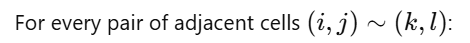

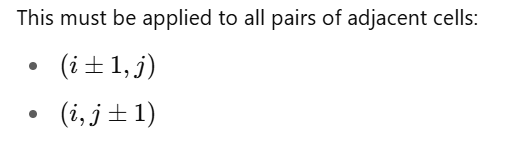

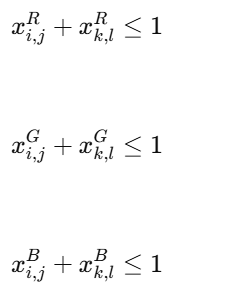

# Energy function (that is negative of Objective function is)

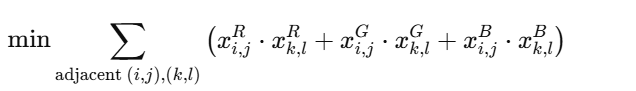

In [ ]:
import random

def generate_colored_grid(n, m, red_count, green_count, blue_count):
    """Generates a valid n x m grid with no two adjacent tiles having the same color."""
    def is_valid(grid, row, col, color, n, m):
        """Checks if placing the given color at (row, col) is valid."""
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
        for dr, dc in directions:
            r, c = row + dr, col + dc
            if 0 <= r < n and 0 <= c < m and grid[r][c] == color:
                return False  # Adjacent tile has the same color
        return True

    def solve(grid, positions, color_counts, n, m):
        """Fills the grid ensuring no two adjacent tiles have the same color."""
        random.shuffle(positions)  # Shuffle positions for randomness

        for row, col in positions:
            available_colors = [color for color in ['R', 'G', 'B'] if color_counts[color] > 0 and is_valid(grid, row, col, color, n, m)]
            if available_colors:
                chosen_color = random.choice(available_colors)
                grid[row][col] = chosen_color
                color_counts[chosen_color] -= 1

    total_tiles = n * m
    if red_count + green_count + blue_count != total_tiles:
        print("Invalid input: Total number of tiles does not match grid size!")
        return None

    grid = [[None for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red_count, 'G': green_count, 'B': blue_count}
    positions = [(i, j) for i in range(n) for j in range(m)]
    random.shuffle(positions)  # Shuffle positions for randomness
    solve(grid, positions, color_counts, n, m)

    # Collect remaining empty positions
    empty_positions = [(i, j) for i in range(n) for j in range(m) if grid[i][j] is None]
    random.shuffle(empty_positions)  # Shuffle for randomness

    # Fill remaining empty positions with available colors
    for row, col in empty_positions:
        available_colors = [color for color in ['R', 'G', 'B'] if color_counts[color] > 0]
        if available_colors:
            chosen_color = random.choice(available_colors)
            grid[row][col] = chosen_color
            color_counts[chosen_color] -= 1

    return grid

# User Input
n = int(input("Enter the number of rows: "))
m = int(input("Enter the number of columns: "))
red_count = int(input("Enter the number of Red tiles: "))
green_count = int(input("Enter the number of Green tiles: "))
blue_count = int(input("Enter the number of Blue tiles: "))

# Generate and print the grid
grid = generate_colored_grid(n, m, red_count, green_count, blue_count)

# Print the grid
if grid:
    for row in grid:
        print(" ".join(cell if cell is not None else '-' for cell in row))

Enter the number of rows: 5
Enter the number of columns: 5
Enter the number of Red tiles: 8
Enter the number of Green tiles: 9
Enter the number of Blue tiles: 8
G R G R G
B G B G B
R R G B R
G B B R G
R B G B R


.




























.






















.
























.





















.




























.


























.


























.



# **Big Coloured Block Constraint**

 **Method:**

 Choose a colour, Let us say blue

 Chose the dimensions of the block and number of blocks.

 Check if the possible arrangement is possible

 n* (s*s) <= B



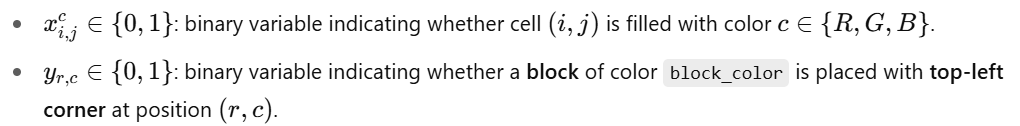

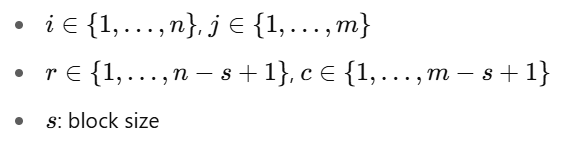

**Constarints**

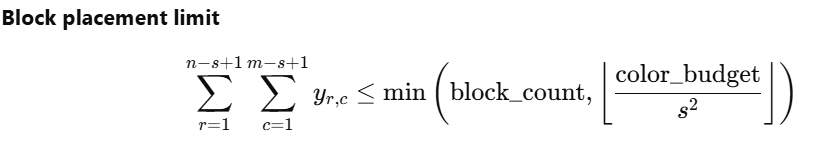

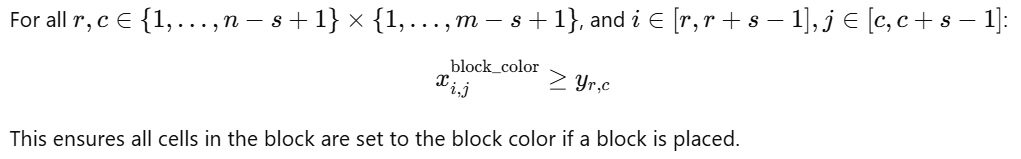

**Non-overlapping blocks**



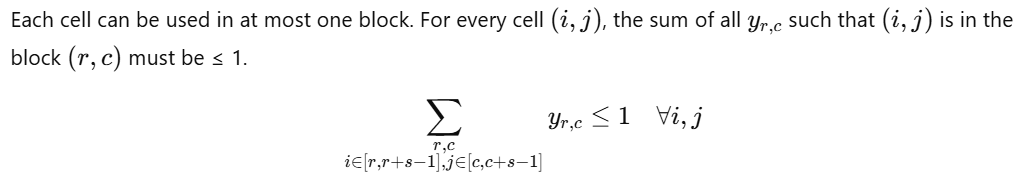

# Objective function

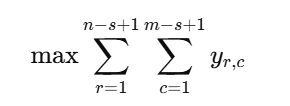

In [ ]:
def generate_grid(n, m, red, green, blue, block_color, block_size, block_count):
    grid = [[' ' for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red, 'G': green, 'B': blue}
    max_possible_blocks = min(block_count, color_counts.get(block_color, 0) // (block_size ** 2))
    placed_blocks = 0
    available_rows = list(range(0, n - block_size+1))
    random.shuffle(available_rows)

    for row_index in available_rows:
        if placed_blocks >= max_possible_blocks:
            break
        available_cols = list(range(0, m - block_size+1))
        random.shuffle(available_cols)
        for col_index in available_cols:
            if placed_blocks >= max_possible_blocks:
                break
            if all(grid[r][c] == ' ' for r in range(row_index, row_index + block_size) for c in range(col_index, col_index + block_size)):
                for r in range(row_index, row_index + block_size):
                    for c in range(col_index, col_index + block_size):
                        grid[r][c] = block_color
                placed_blocks += 1
                color_counts[block_color] -= (block_size ** 2)

    if placed_blocks < block_count:
        print(f"Warning: Could only place {placed_blocks} out of {block_count} blocks.")

    empty_positions = [(r, c) for r in range(n) for c in range(m) if grid[r][c] == ' ']
    random.shuffle(empty_positions)

    for r, c in empty_positions:
        available_colors = [color for color in color_counts if color_counts[color] > 0]
        if available_colors:
            chosen_color = random.choice(available_colors)
            grid[r][c] = chosen_color
            color_counts[chosen_color] -= 1

    return grid



row = int(input("Enter number of rows: "))
col = int(input("Enter number of columns: "))
red = int(input("Enter number of red cells: "))
green = int(input("Enter number of green cells: "))
blue = int(input("Enter number of blue cells: "))
block_color = input("Enter block color (R/G/B): ").strip().upper()
block_size = int(input("Enter block size: "))
block_count = int(input("Enter number of blocks: "))
grid = generate_grid(row, col, red, green, blue, block_color, block_size, block_count)
print("\nGenerated Grid:")
for row in grid:
    print(" ".join(row))


Enter number of rows: 8
Enter number of columns: 8
Enter number of red cells: 30
Enter number of green cells: 20
Enter number of blue cells: 14
Enter block color (R/G/B): R
Enter block size: 3
Enter number of blocks: 3

Generated Grid:
G B B B R G G B
G R R R R R R R
B R R R R R R G
B R R R R R R B
B G B G B G B G
R R R G B G B G
R R R G B R G G
R R R G G G G G


We aim to place non-overlapping s×s blocks of a specific color (block_color), as many as possible (up to the user-defined block_count and bounded by available color cells).

Remaining cells are filled with the leftover colored cells.

.


































.




































.










































.




































.































.





























.


















# **Pattern constraint**


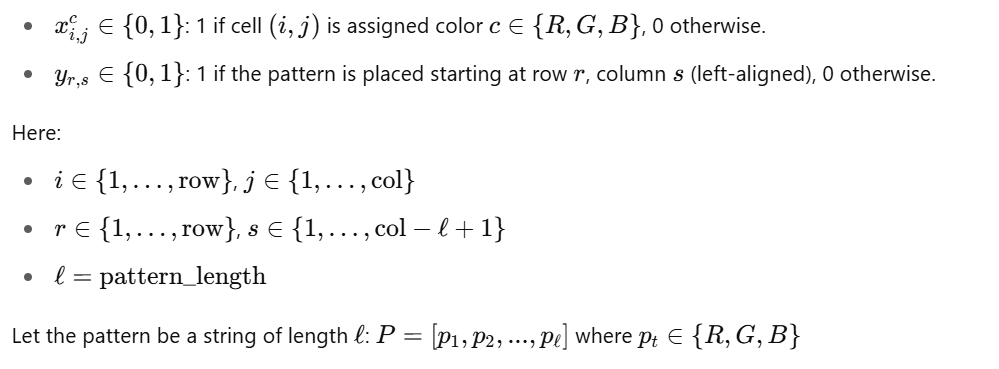

Pattern enforcement:




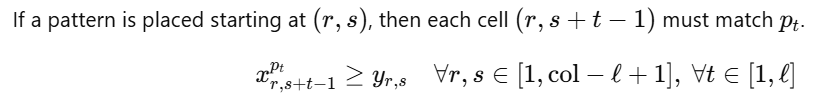

 Non overlapping pattern:



 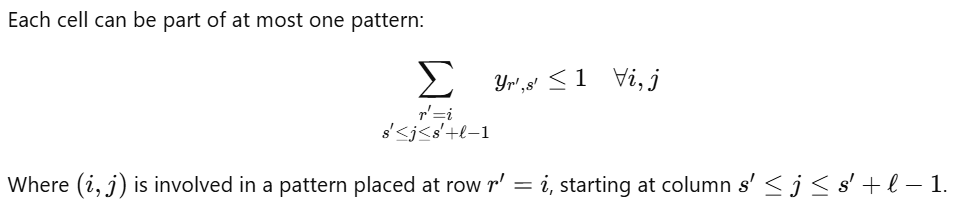

# Objective function:




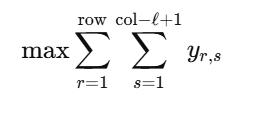

In [ ]:
import random

def generate_grid(row, col, red, green, blue, pattern_length, pattern):
    if row * col != red + green + blue:
        return "Error: The total number of colored cells does not match the grid size!", 0
    if pattern_length > col:
        return "\n❌ This configuration cannot be possible! The pattern length exceeds the number of columns.", 0
    if len(pattern) != pattern_length:
        return "\n❌ Invalid Pattern: The specified pattern length does not match the given pattern!", 0
    def max_patterns_count(color_counts, pattern):
        pattern_color_counts = {color: pattern.count(color) for color in set(pattern)}
        return min(
            (color_counts.get(color, 0) // count if count > 0 else float('inf'))
            for color, count in pattern_color_counts.items()
        )
    def fill_remaining(grid, color_counts):
        empty_positions = [(r, c) for r in range(row) for c in range(col) if grid[r][c] == ' ']
        random.shuffle(empty_positions)
        for r, c in empty_positions:
            available_colors = [color for color in color_counts if color_counts[color] > 0]
            if available_colors:
                chosen_color = random.choice(available_colors)
                grid[r][c] = chosen_color
                color_counts[chosen_color] -= 1
    def fill_with_patterns(grid, pattern, max_patterns_count):
        applied_patterns = 0
        row_positions = list(range(0, row))
        random.shuffle(row_positions)

        for r in row_positions:
            if applied_patterns >= max_patterns_count:
                break
            col_positions = list(range(0, col - pattern_length + 1))
            random.shuffle(col_positions)
            for start_col in col_positions:
                end_col = start_col + pattern_length
                if applied_patterns >= max_patterns_count:
                    break
                if all(grid[r][c] == ' ' for c in range(start_col, end_col)):
                    for i, color in enumerate(pattern):
                        grid[r][start_col + i] = color
                        color_counts[color] -= 1
                    applied_patterns += 1
        return applied_patterns
    grid = [[' ' for _ in range(col)] for _ in range(row)]
    color_counts = {'R': red, 'G': green, 'B': blue}

    if max_patterns_count(color_counts, pattern) == 0:
        return "\n❌ This configuration cannot be possible!", 0

    patterns_applied = fill_with_patterns(grid, pattern, max_patterns_count(color_counts, pattern))
    fill_remaining(grid, color_counts)

    print(f"\nTotal patterns applied: {patterns_applied}")

    return grid
row = int(input("Enter number of rows: "))
col = int(input("Enter number of columns: "))
red = int(input("Enter number of red cells: "))
green = int(input("Enter number of green cells: "))
blue = int(input("Enter number of blue cells: "))
pattern_length = int(input("Enter the number of tiles for the pattern: "))
pattern = input(f"Enter the pattern of {pattern_length} tiles (e.g., RRGB): ").strip().upper()
grid = generate_grid(row, col, red, green, blue, pattern_length, pattern)
print("\nGenerated Grid:")
for row in grid:
    print(" ".join(row))

Enter number of rows: 8
Enter number of columns: 8
Enter number of red cells: 30
Enter number of green cells: 20
Enter number of blue cells: 14
Enter the number of tiles for the pattern: 3
Enter the pattern of 3 tiles (e.g., RRGB): RGR

Total patterns applied: 15

Generated Grid:
G R G R R G R B
G B R G R R G R
R G R B B R G R
B B R G R R G R
R G R B B R G R
B R G R G B B B
R G R R G R G G
B R G R R G R B



We aim to place as many non-overlapping row-wise patterns of given length and color sequence.

Each pattern must be fully embedded in a single row and must not overlap with others.

Any leftover color cells are distributed randomly (in code), but here they are accounted for exactly via total color constraints.

.























.


































.





































.












































.





























.
































.

# Multiple Constraints

Now we apply multiple constraints at the same time.

# Weighted Positional + Adjacency Constraint

we defined weights in all 4 quadrants for all colours in case of even dimension

w_red_UL + w_red_UR + w_red_LL + w_red_LR = 1

and in case of odd dimension we also defined weights on axis and origin.

there were weights for neighbouring elements (i.e. Adjacency weights for the pairs)


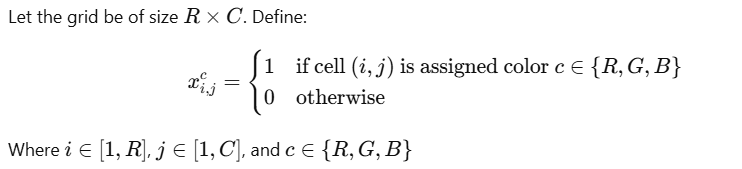

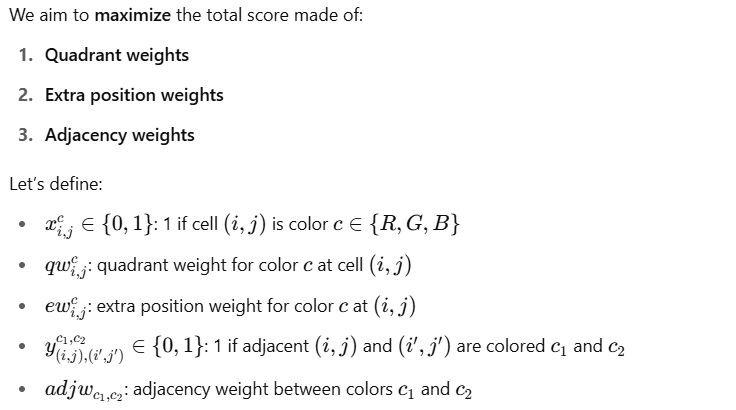

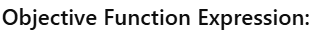

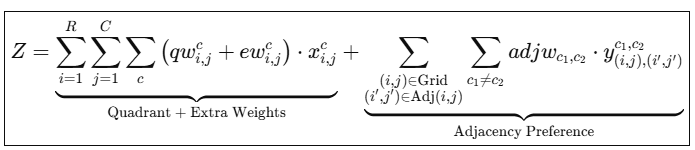

then we sample the  feasible grids that maximize the above objective function.

In [15]:
import itertools
import random

def generate_color_grid(rows, cols, red, green, blue, red_weights, green_weights, blue_weights,
                        red_extra_weights, green_extra_weights, blue_extra_weights, adj_weights):
    # Validate grid dimensions
    if not (isinstance(rows, int) and isinstance(cols, int) and rows > 0 and cols > 0):
        raise ValueError("Rows and columns must be positive integers")

    # Validate cell counts
    if not (isinstance(red, int) and isinstance(green, int) and isinstance(blue, int)):
        raise ValueError("Cell counts must be integers")
    if red < 0 or green < 0 or blue < 0:
        raise ValueError("Cell counts cannot be negative")
    if red + green + blue != rows * cols:
        raise ValueError("Sum of cell counts must equal total grid size")

    # Validate weight lists
    for weights, name in [(red_weights, "Red"), (green_weights, "Green"), (blue_weights, "Blue")]:
        if not (isinstance(weights, list) and len(weights) == 4 and abs(sum(weights) - 10) < 1e-6):
            raise ValueError(f"{name} quadrant weights must be 4 numbers summing to 10")

    for weights, name in [(red_extra_weights, "Red"), (green_extra_weights, "Green"), (blue_extra_weights, "Blue")]:
        if not (isinstance(weights, list) and len(weights) == 5 and abs(sum(weights) - 10) < 1e-6):
            raise ValueError(f"{name} extra weights must be 5 numbers summing to 10")

    # Validate adjacency weights
    if not isinstance(adj_weights, dict) or not all(c in adj_weights for c in 'RGB'):
        raise ValueError("Adjacency weights must be a dictionary with R, G, B keys")
    weight_sum = adj_weights['R'].get('G', 0) + adj_weights['R'].get('B', 0) + adj_weights['G'].get('B', 0)
    if abs(weight_sum - 10) > 1e-6:
        raise ValueError("Adjacency weights must sum to 10")

    def generate_empty_grid(rows, cols):
        return [['-' for _ in range(cols)] for _ in range(rows)]

    def count_neighbors(grid, row, col, rows, cols):
        neighbors = {'R': 0, 'G': 0, 'B': 0}
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nr, nc = row + dr, col + dc
            if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] in neighbors:
                neighbors[grid[nr][nc]] += 1
        return neighbors

    def fill_quadrant(grid, quadrant, color_counts, color_weights, adj_weights, rows, cols, score):
        quadrant_map = {
            'UL': (0, 0, rows // 2, cols // 2),
            'UR': (0, cols // 2, rows // 2, cols),
            'LL': (rows // 2, 0, rows, cols // 2),
            'LR': (rows // 2, cols // 2, rows, cols)
        }

        r_start, c_start, r_end, c_end = quadrant_map[quadrant]
        positions = [(r, c) for r in range(r_start, r_end) for c in range(c_start, c_end)]
        random.shuffle(positions)

        for r, c in positions:
            neighbor_counts = count_neighbors(grid, r, c, rows, cols)
            scores = {
                color: color_weights[color][list(quadrant_map.keys()).index(quadrant)] +
                    sum(neighbor_counts[n] * adj_weights[color].get(n, 0) for n in 'RGB')
                for color in 'RGB'
            }

            sorted_colors = sorted(scores.keys(), key=lambda c: scores[c], reverse=True)

            for best_color in sorted_colors:
                if color_counts[best_color] > 0:
                    grid[r][c] = best_color
                    color_counts[best_color] -= 1
                    score[0] += scores[best_color]
                    break

    def fill_extra_cells(grid, color_counts, extra_weights, adj_weights, rows, cols, score):
        extra_positions = []
        extra_weight_map = {
            "+x": 0, "-x": 1, "+y": 2, "-y": 3, "O": 4
        }

        if rows % 2 == 1:
            extra_positions += [(rows // 2, c, "+x") for c in range(cols // 2 + 1, cols)]
            extra_positions += [(rows // 2, c, "-x") for c in range(0, cols // 2)]

        if cols % 2 == 1:
            extra_positions += [(r, cols // 2, "+y") for r in range(0, rows // 2)]
            extra_positions += [(r, cols // 2, "-y") for r in range(rows // 2 + 1, rows)]

        if rows % 2 == 1 and cols % 2 == 1:
            extra_positions.append((rows // 2, cols // 2, "O"))

        random.shuffle(extra_positions)

        for r, c, pos_type in extra_positions:
            neighbor_counts = count_neighbors(grid, r, c, rows, cols)
            weight_index = extra_weight_map[pos_type]

            scores = {
                color: extra_weights[color][weight_index] +
                    sum(neighbor_counts[n] * adj_weights[color].get(n, 0) for n in 'RGB')
                for color in 'RGB'
            }

            sorted_colors = sorted(scores.keys(), key=lambda c: scores[c], reverse=True)

            for best_color in sorted_colors:
                if color_counts[best_color] > 0:
                    grid[r][c] = best_color
                    color_counts[best_color] -= 1
                    score[0] += scores[best_color]
                    break

    best_grids = []
    quadrant_orders = list(itertools.permutations(['UL', 'UR', 'LR', 'LL']))[:24]

    for quadrant_order in quadrant_orders:
        grid = generate_empty_grid(rows, cols)
        color_counts = {'R': red, 'G': green, 'B': blue}
        color_weights = {'R': red_weights, 'G': green_weights, 'B': blue_weights}
        extra_weights = {'R': red_extra_weights, 'G': green_extra_weights, 'B': blue_extra_weights}
        score = [0]

        for quadrant in quadrant_order:
            fill_quadrant(grid, quadrant, color_counts, color_weights, adj_weights, rows, cols, score)

        fill_extra_cells(grid, color_counts, extra_weights, adj_weights, rows, cols, score)

        best_grids.append((score[0], grid))

    best_grids.sort(reverse=True, key=lambda x: x[0])
    return best_grids[0][1]  # Return the best grid

# Custom input collection
try:
    rows = int(input("Enter the number of rows: "))
    cols = int(input("Enter the number of columns: "))

    red = int(input("Enter the number of red cells: "))
    green = int(input("Enter the number of green cells: "))
    blue = int(input("Enter the number of blue cells: "))

    red_weights = list(map(float, input("Enter the quadrant weights for Red (UL UR LR LL): ").split()))
    green_weights = list(map(float, input("Enter the quadrant weights for Green (UL UR LR LL): ").split()))
    blue_weights = list(map(float, input("Enter the quadrant weights for Blue (UL UR LR LL): ").split()))

    red_extra_weights = list(map(float, input("Enter extra weights for Red (+x -x +y -y Origin): ").split()))
    green_extra_weights = list(map(float, input("Enter extra weights for Green (+x -x +y -y Origin): ").split()))
    blue_extra_weights = list(map(float, input("Enter extra weights for Blue (+x -x +y -y Origin): ").split()))

    adj_weights_input = list(map(float, input("Enter adjacency weights for Red-Green, Red-Blue, Green-Blue: ").split()))
    adj_weights = {
        'R': {'G': adj_weights_input[0], 'B': adj_weights_input[1]},
        'G': {'R': adj_weights_input[0], 'B': adj_weights_input[2]},
        'B': {'R': adj_weights_input[1], 'G': adj_weights_input[2]}
    }

    # Generate and print grid
    grid = generate_color_grid(rows, cols, red, green, blue,
                              red_weights, green_weights, blue_weights,
                              red_extra_weights, green_extra_weights, blue_extra_weights,
                              adj_weights)
    for row in grid:
        print(" ".join(row))

except ValueError as e:
    print(f"Error: {e}")
except IndexError:
    print("Error: Incorrect number of weights provided")
except Exception as e:
    print(f"Error: An unexpected error occurred - {e}")

Enter the number of rows: 8
Enter the number of columns: 8
Enter the number of red cells: 23
Enter the number of green cells: 32
Enter the number of blue cells: 9
Enter the quadrant weights for Red (UL UR LR LL): 1 3 1 5
Enter the quadrant weights for Green (UL UR LR LL): 6 3 1 0
Enter the quadrant weights for Blue (UL UR LR LL): 2 3 1 4
Enter extra weights for Red (+x -x +y -y Origin):  2 3 1 1 3
Enter extra weights for Green (+x -x +y -y Origin):  4 3 1 1 1
Enter extra weights for Blue (+x -x +y -y Origin): 0 0 0 1 9
Enter adjacency weights for Red-Green, Red-Blue, Green-Blue:  8 1 1
R G R G B G B G
G R G R G B G B
R G R G B B B G
G R G R G G B G
R G R G R R G R
G R G R G G R G
R G R G R R G B
G R G R G G R G


.

















.




































.


































.

























.





























.




















.






















# Adjancency + Periphery +Diagonal

Define binary variables

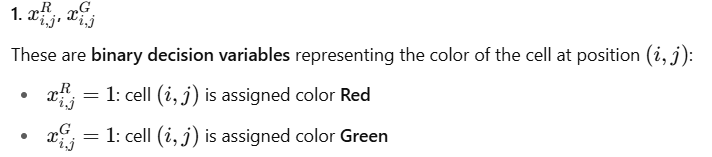

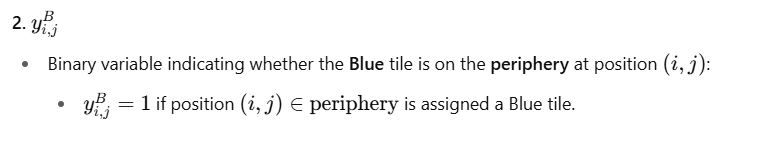

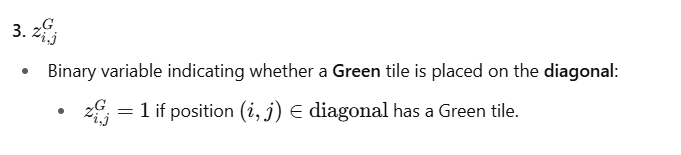

#Boltzmann Objective function

the weights are taken equal by defalut but they can be adjust as per user requirement. if user wants to prioritize between the constraints

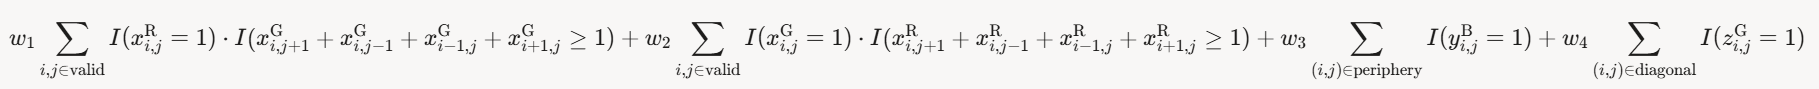

Here I() is Indicator function:


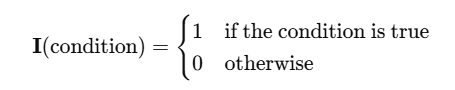

w1
​
 : weight for placing a Red tile adjacent to at least one Green tile

𝑤2
 : weight for placing a Green tile adjacent to at least one Red tile

𝑤3​
 : reward for placing a Blue tile on the periphery

𝑤4​
 : reward for placing a Green tile on the diagonal

more simplified form for understanding:

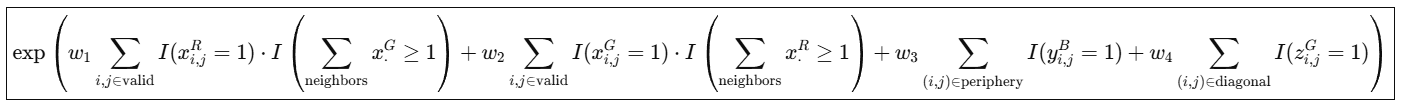

E= energy function is the negative of the above function = negative of sum of weighted indicator terms

we sample in such a way that energy function is minimized so that acceptance prob is more

acceptance probability of a color swap from state S to S ′

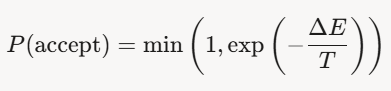

In [16]:
import random

def generate_grid(dimension, red, green, blue, periphery_colors, diagonal_colors, adjacent_tiles):
    if dimension < 2:
        raise ValueError("Dimension must be at least 2")
    if any(c < 0 for c in (red, green, blue)):
        raise ValueError("Tile counts must be non-negative")

    def initialize_grid_and_counts():
        """Initialize an empty grid and color counts dictionary"""
        return [[None] * dimension for _ in range(dimension)], {'R': red, 'G': green, 'B': blue}

    def get_positions():
        """Get periphery and diagonal positions"""
        periphery = [(0, j) for j in range(dimension)] + \
                    [(i, dimension - 1) for i in range(1, dimension)] + \
                    [(dimension - 1, j) for j in range(dimension - 2, -1, -1)] + \
                    [(i, 0) for i in range(dimension - 2, 0, -1)]
        diagonal = list(dict.fromkeys([(i, i) for i in range(dimension)] +
                                      [(i, dimension - 1 - i) for i in range(dimension)]))
        return periphery, diagonal

    def fill_periphery(grid, periphery_positions, color_counts):
        """Fill periphery with available colors, prioritizing periphery_colors"""
        random.shuffle(periphery_positions)
        for i, j in periphery_positions:
            if grid[i][j] is None and periphery_colors and color_counts[periphery_colors[0]] > 0:
                grid[i][j] = periphery_colors[0]
                color_counts[periphery_colors[0]] -= 1

    def fill_diagonal(grid, diagonal_positions, color_counts):
        """Fill diagonal with available B tiles"""
        random.shuffle(diagonal_positions)
        for i, j in diagonal_positions:
            if grid[i][j] is None and diagonal_colors and color_counts[diagonal_colors[0]] > 0:
                grid[i][j] = diagonal_colors[0]
                color_counts[diagonal_colors[0]] -= 1

    def ensure_adjacency(grid, color_counts, tile1, tile2):
        """Ensure tile1 and tile2 are adjacent where possible"""
        empty_positions = [(i, j) for i in range(dimension) for j in range(dimension) if grid[i][j] is None]
        random.shuffle(empty_positions)
        pairs_needed = min(color_counts[tile1], color_counts[tile2])

        for _ in range(pairs_needed):
            for i, j in empty_positions[:]:
                if color_counts[tile1] > 0:
                    grid[i][j] = tile1
                    color_counts[tile1] -= 1
                    empty_positions.remove((i, j))
                    adjacent_positions = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
                    random.shuffle(adjacent_positions)
                    for ai, aj in adjacent_positions:
                        if (0 <= ai < dimension and 0 <= aj < dimension and
                            grid[ai][aj] is None and color_counts[tile2] > 0):
                            grid[ai][aj] = tile2
                            color_counts[tile2] -= 1
                            empty_positions.remove((ai, aj))
                            break
                    break

    def fill_remaining(grid, color_counts):
        """Fill remaining positions with exact counts"""
        empty_positions = [(i, j) for i in range(dimension) for j in range(dimension) if grid[i][j] is None]
        remaining_tiles = [tile for tile, count in color_counts.items() for _ in range(count)]
        random.shuffle(remaining_tiles)

        valid_colors = ['R', 'G', 'B']
        while len(remaining_tiles) < len(empty_positions):
            remaining_tiles.append(random.choice(valid_colors))

        for (i, j), tile in zip(empty_positions, remaining_tiles[:len(empty_positions)]):
            grid[i][j] = tile

    # Validate constraints
    total_cells = dimension * dimension
    valid_colors = {'R', 'G', 'B'}
    if not all(c in valid_colors for c in periphery_colors + diagonal_colors + adjacent_tiles):
        raise ValueError("Invalid colors detected. Use only R, G, B.")
    if len(adjacent_tiles) != 2:
        raise ValueError("Exactly 2 adjacent tiles required.")
    if red + green + blue != total_cells:
        raise ValueError(f"Color counts ({red + green + blue}) don't match grid size ({total_cells}).")

    # Generate one grid with randomization for variety
    grid, color_counts = initialize_grid_and_counts()
    periphery_positions, diagonal_positions = get_positions()

    fill_periphery(grid, periphery_positions, color_counts)
    fill_diagonal(grid, diagonal_positions, color_counts)
    ensure_adjacency(grid, color_counts, adjacent_tiles[0], adjacent_tiles[1])
    fill_remaining(grid, color_counts)

    return grid  # Single return point for the grid

# Take input outside the function
dimension = int(input("Enter the dimension of the square grid: "))
red = int(input("Enter the number of red tiles: "))
green = int(input("Enter the number of green tiles: "))
blue = int(input("Enter the number of blue tiles: "))
periphery_colors = input("Enter periphery colors (e.g., R G B): ").strip().upper().split()
diagonal_colors = input("Enter diagonal colors (e.g., R G B): ").strip().upper().split()
adjacent_tiles = input("Enter two tiles for adjacency (e.g., R G): ").strip().upper().split()

# Generate and print one sample grid
grid = generate_grid(dimension, red, green, blue, periphery_colors, diagonal_colors, adjacent_tiles)
for row in grid:
    print(" ".join(row))

Enter the dimension of the square grid: 8
Enter the number of red tiles: 23
Enter the number of green tiles: 32
Enter the number of blue tiles: 9
Enter periphery colors (e.g., R G B): B
Enter diagonal colors (e.g., R G B): G
Enter two tiles for adjacency (e.g., R G): R G
G G R G B B B G
R G R R G R G R
R G G R G G R G
B R G G G R G R
R G R G G G G R
G G G G R G R B
R G R G G R G B
G R G B R B R B


Observe:

Red tiles with adjacent Green tiles

Green tiles with adjacent Red tiles

Blue tiles on the border

Green tiles on diagonals

.






























.


































.
























.




































.





































.


















.

















.















.


# Periphery and Diagonal (Priority) Constraint

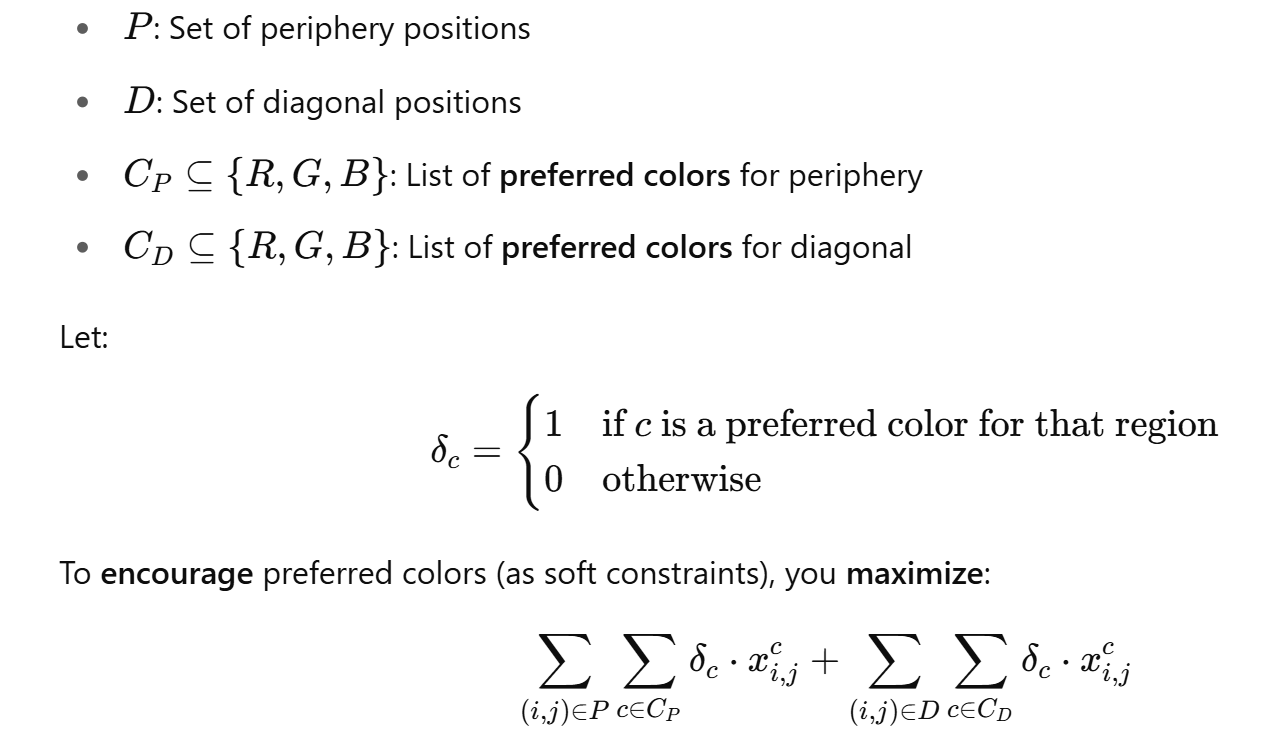

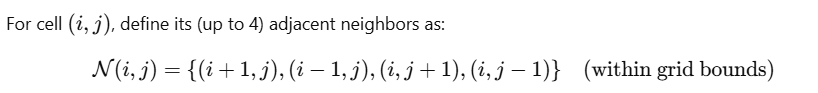

4 above means:  up, down, left, right.

# Objective Function



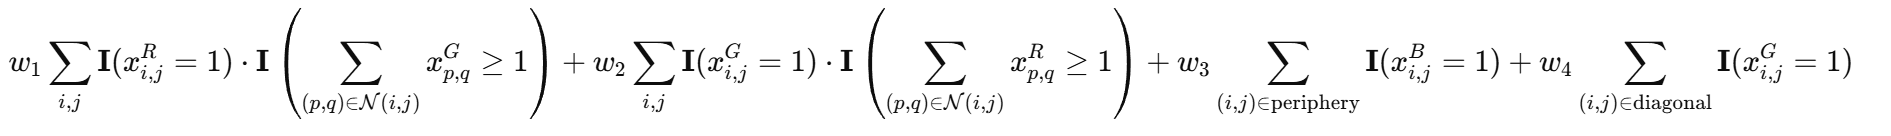

In [17]:
import random

def fill_grid_combined(dimension, red, green, blue, periphery_colors, diagonal_colors, constraint_priority):
    def initialize_grid():
        return [[None] * dimension for _ in range(dimension)]

    def get_positions():
        periphery = [(0, j) for j in range(dimension)] + \
                    [(i, dimension - 1) for i in range(1, dimension)] + \
                    [(dimension - 1, j) for j in range(dimension - 2, -1, -1)] + \
                    [(i, 0) for i in range(dimension - 2, 0, -1)]
        diagonal = list(set([(i, i) for i in range(dimension)] + [(i, dimension - 1 - i) for i in range(dimension)]))
        random.shuffle(periphery)
        random.shuffle(diagonal)
        return periphery, diagonal

    def assign_priority():
        return [(diagonal_positions, diagonal_colors), (periphery_positions, periphery_colors)] if constraint_priority == "diagonal" else [(periphery_positions, periphery_colors), (diagonal_positions, diagonal_colors)]

    def fill_positions(priority_order):
        for positions, color_priority in priority_order:
            if not color_priority:
                continue
            for i, j in positions:
                if grid[i][j] is not None:
                    continue
                assigned = False
                for color in color_priority:
                    if color_counts[color] > 0:
                        grid[i][j] = color
                        color_counts[color] -= 1
                        assigned = True
                        break
                if not assigned:
                    for color in 'RGB':
                        if color_counts[color] > 0:
                            grid[i][j] = color
                            color_counts[color] -= 1
                            break

    def fill_remaining():
        empty_positions = [(i, j) for i in range(dimension) for j in range(dimension) if grid[i][j] is None]
        random.shuffle(empty_positions)
        available_colors = ['R'] * color_counts['R'] + ['G'] * color_counts['G'] + ['B'] * color_counts['B']
        random.shuffle(available_colors)

        for (i, j), color in zip(empty_positions, available_colors):
            grid[i][j] = color

    if red + green + blue != dimension * dimension:
        raise ValueError(f"Error: The sum of tiles must equal {dimension * dimension} (dimension²). Please try again.")

    grid = initialize_grid()
    color_counts = {'R': red, 'G': green, 'B': blue}
    periphery_positions, diagonal_positions = get_positions()
    priority_order = assign_priority()
    fill_positions(priority_order)
    fill_remaining()
    return grid

# Taking input outside the function
dimension = int(input("Enter the dimension of the square grid: "))
red = int(input("Enter the number of red tiles: "))
green = int(input("Enter the number of green tiles: "))
blue = int(input("Enter the number of blue tiles: "))

# Default constraints applied
periphery_colors = list(dict.fromkeys(input("Enter periphery colors (R G B): ").strip().upper().split()))
diagonal_colors = list(dict.fromkeys(input("Enter diagonal colors (R G B): ").strip().upper().split()))
constraint_priority = input("Enter constraint priority (diagonal/periphery): ").strip().lower()

# Generating and printing the grid
grid = fill_grid_combined(dimension, red, green, blue, periphery_colors, diagonal_colors, constraint_priority)
for row in grid:
    print(" ".join(row))

Enter the dimension of the square grid: 8
Enter the number of red tiles: 23
Enter the number of green tiles: 32
Enter the number of blue tiles: 9
Enter periphery colors (R G B): G
Enter diagonal colors (R G B): R
Enter constraint priority (diagonal/periphery): diagonal
R G G G G G G R
G R B G R B R G
G B R B B R B G
G R R R R G R G
G R G R R G R G
G G R G B R B G
G R G G B R R G
R G G G G G G R


.






































.















































.














.





















.


















.

















.
















.






































.















































.














.





















.


















.

















.


















# Periphery & Big Color Block Constraint
input : user specific constraints on colored cells of periphery placement, and block placement.

The periphery consists of the top row, bottom row, leftmost column (excluding corners already counted in rows), and rightmost column (excluding corners).

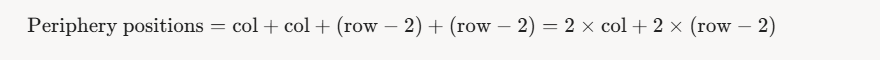

**Block Placement Constraints**


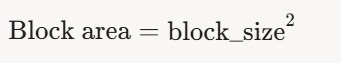

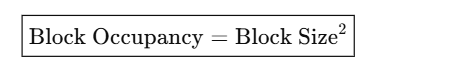

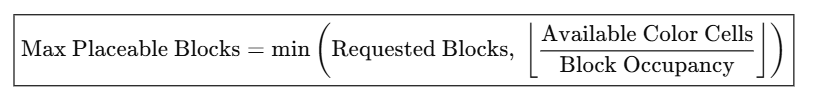

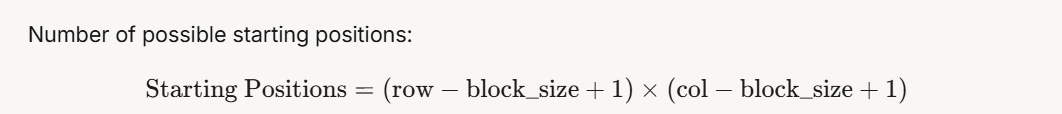

After periphery and block placements, remaining empty cells are filled with colors (R, G, B) based on remaining color_counts.

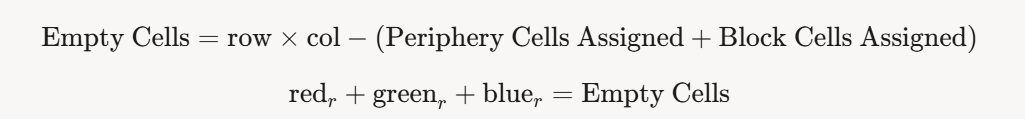

For each cell assigned a color (periphery, block, or remaining), the corresponding color count is decremented:

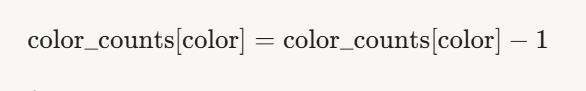

For each block placed:


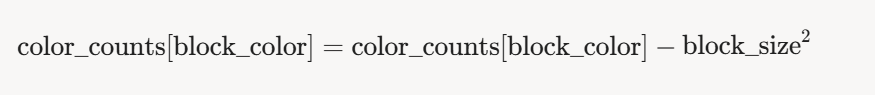

# Objective Function



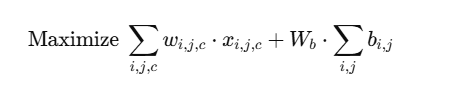

In [ ]:
import random

def generate_grid(row, col, red, green, blue, periphery_order, block_color, block_size, block_count):
    if row * col != red + green + blue:
        print("Error: The total number of colored cells does not match the grid size!")
        return []

    grid = [[' ' for _ in range(col)] for _ in range(row)]
    color_counts = {'R': red, 'G': green, 'B': blue}
    positions = [(0, i) for i in range(col)] + [(row - 1, i) for i in range(col)] + [(i, 0) for i in range(1, row - 1)] + [(i, col - 1) for i in range(1, row - 1)]
    random.shuffle(positions)

    for color in periphery_order:
        for x, y in positions:
            if grid[x][y] == ' ' and color_counts.get(color, 0) > 0:
                grid[x][y] = color
                color_counts[color] -= 1

    max_possible_blocks = min(block_count, color_counts.get(block_color, 0) // (block_size ** 2))
    placed_blocks = 0
    available_rows = list(range(1, row - block_size))
    random.shuffle(available_rows)

    for row_index in available_rows:
        if placed_blocks >= max_possible_blocks:
            break
        available_cols = list(range(1, col - block_size))
        random.shuffle(available_cols)
        for col_index in available_cols:
            if placed_blocks >= max_possible_blocks:
                break
            if all(grid[r][c] == ' ' for r in range(row_index, row_index + block_size) for c in range(col_index, col_index + block_size)):
                for r in range(row_index, row_index + block_size):
                    for c in range(col_index, col_index + block_size):
                        grid[r][c] = block_color
                placed_blocks += 1
                color_counts[block_color] -= (block_size ** 2)

    if placed_blocks < block_count:
        print(f"Warning: Could only place {placed_blocks} out of {block_count} blocks.")

    empty_positions = [(r, c) for r in range(row) for c in range(col) if grid[r][c] == ' ']
    random.shuffle(empty_positions)

    for r, c in empty_positions:
        available_colors = [color for color in color_counts if color_counts[color] > 0]
        if available_colors:
            chosen_color = random.choice(available_colors)
            grid[r][c] = chosen_color
            color_counts[chosen_color] -= 1

    return grid

row = int(input("Enter number of rows: "))
col = int(input("Enter number of columns: "))
red = int(input("Enter number of red cells: "))
green = int(input("Enter number of green cells: "))
blue = int(input("Enter number of blue cells: "))
periphery_order = input("Enter the order of periphery colors (space-separated, e.g., G R B): ").split()
block_color = input("Enter block color (R/G/B): ").strip().upper()
block_size = int(input("Enter block size: "))
block_count = int(input("Enter number of blocks: "))

result_grid = generate_grid(row, col, red, green, blue, periphery_order, block_color, block_size, block_count)
for r in result_grid:
    print(' '.join(r))

Enter number of rows: 8
Enter number of columns: 8
Enter number of red cells: 20
Enter number of green cells: 25
Enter number of blue cells: 19
Enter the order of periphery colors (space-separated, e.g., G R B): R
Enter block color (R/G/B): G
Enter block size: 3
Enter number of blocks: 2
G G R R R B G R
R G G G G G G R
B G G G G G G R
B G G G G G G R
R B B B B G B B
R B B B B B B R
R G B G G B B R
R R R R B R R R


.






































.















































.














.





















.


















.

















.
















.






































.















































.














.





















.


















.

















.


















# Periphery & Non-adjacency Constraint

**Periphery Cell Count**

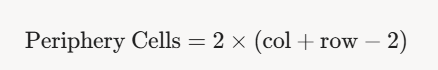

**Adjacency Constraint (Non-Touching Rule)**

The non-adjacency constraint ensures that when a color is placed at a grid position
(
𝑥
,
𝑦
)
, none of its four adjacent cells (right, down, left, up) have the same color.

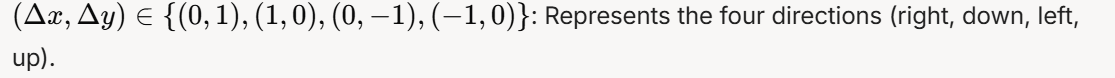

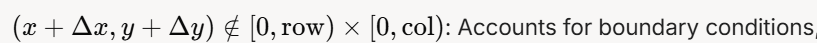

Priority order set:

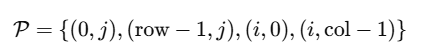

# Objective Function:


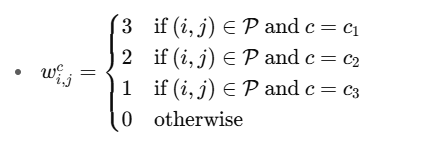








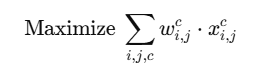

for getting the optimal inital sample (that maximise above objective function) to reduce the time complexity and burn in samples for sampling method:

we prioritize placing colors on the grid's periphery in a user defined specified order, then fill the remaining cells while enforcing constraint that no two adjacent cells (horizontally or vertically) share the same color during the main filling phase, using a randomized approach.

In [ ]:
import random

def generate_grid(row, col, red, green, blue, periphery_order):
    """Generates a valid grid based on user input."""

    def is_valid(grid, x, y, color):
        """Check if placing color at (x, y) does not touch the same color."""
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        return all(
            not (0 <= x + dx < len(grid) and 0 <= y + dy < len(grid[0]) and grid[x + dx][y + dy] == color)
            for dx, dy in directions
        )

    def fill_grid(grid, color_counts):
        """Fills the grid with colors based on given constraints."""
        positions = [(0, i) for i in range(col)] + [(row - 1, i) for i in range(col)] + \
                    [(i, 0) for i in range(1, row - 1)] + [(i, col - 1) for i in range(1, row - 1)]

        random.shuffle(positions)

        # Place colors in periphery first
        for color in periphery_order:
            for x, y in positions:
                if grid[x][y] == ' ' and color_counts[color] > 0:
                    grid[x][y] = color
                    color_counts[color] -= 1

        # Fill remaining positions
        empty_positions = [(i, j) for i in range(row) for j in range(col) if grid[i][j] == ' ']
        random.shuffle(empty_positions)

        for x, y in empty_positions:
            for color in random.sample(['R', 'G', 'B'], 3):
                if color_counts[color] > 0 and is_valid(grid, x, y, color):
                    grid[x][y] = color
                    color_counts[color] -= 1
                    break

        # Final pass to fill any remaining empty spaces
        empty_positions = [(i, j) for i in range(row) for j in range(col) if grid[i][j] == ' ']
        random.shuffle(empty_positions)

        for x, y in empty_positions:
            for color in random.sample(['R', 'G', 'B'], 3):
                if color_counts[color] > 0:
                    grid[x][y] = color
                    color_counts[color] -= 1
                    break

    if row * col != red + green + blue:
        print("Error: The total number of colored cells does not match the grid size!")
        return None

    grid = [[' ' for _ in range(col)] for _ in range(row)]
    color_counts = {'R': red, 'G': green, 'B': blue}

    fill_grid(grid, color_counts)

    return grid

# User Input
row = int(input("Enter number of rows: "))
col = int(input("Enter number of columns: "))
red = int(input("Enter number of red cells: "))
green = int(input("Enter number of green cells: "))
blue = int(input("Enter number of blue cells: "))
periphery_order = input("Enter the order of periphery colors (space-separated, e.g., G R B): ").split()

grid = generate_grid(row, col, red, green, blue, periphery_order)

# Print the grid if successfully generated
if grid:
    for r in grid:
        print(' '.join(r))

Enter number of rows: 8
Enter number of columns: 8
Enter number of red cells: 20
Enter number of green cells: 25
Enter number of blue cells: 19
Enter the order of periphery colors (space-separated, e.g., G R B): R
G R R R R G B R
R B G B G G G R
R G B G B B B G
R B G B G G G R
G B B B B G B R
R G G B G B G R
R G B G G G B R
R B R R R G R G


.






































.















































.














.





















.


















.

















.
















.






































.















































.














.





















.


















.

















.


















# Periphery & Pattern Consraint

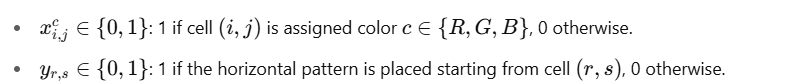

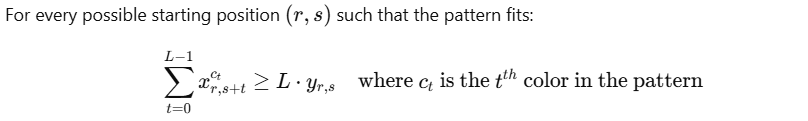


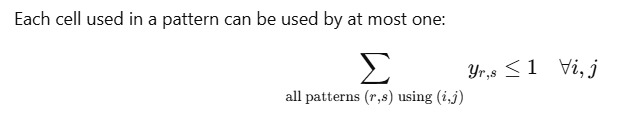

**Valid Starting Columns for Pattern Placement**

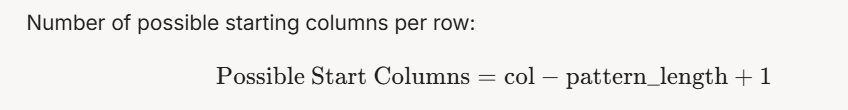

**Pattern Placement Condition**

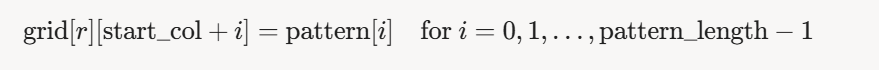

#Objective Function


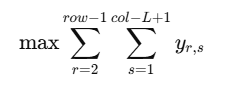


Maximize the number of horizontal patterns placed

for getting the optimal inital sample (that maximise above objective function) to reduce the time complexity and burn in samples for sampling method:


  we employ three-phase filling strategy: first, we assigns colors to the periphery (top, bottom rows, and non-corner side columns).
Second, we apply user-specified color pattern of length
pattern_length
≤column size in inner rows ({1,…,row−2}).
Finally, we fill remaining empty cell with available color using randomized greedy approach.


In [ ]:
import random

def generate_grid(row, col, red, green, blue, periphery_order, pattern_length, pattern):
    if row * col != red + green + blue:
        return "Error: The total number of colored cells does not match the grid size!", 0
    if pattern_length > col:
        return "\n❌ This configuration cannot be possible! The pattern length exceeds the number of columns.", 0
    if len(pattern) != pattern_length:
        return "\n❌ Invalid Pattern: The specified pattern length does not match the given pattern!", 0

    def max_patterns_count(color_counts, pattern):
        pattern_color_counts = {color: pattern.count(color) for color in set(pattern)}
        return min(
            (color_counts.get(color, 0) // count if count > 0 else float('inf'))
            for color, count in pattern_color_counts.items()
        )

    def fill_remaining(grid, color_counts):
        empty_positions = [(r, c) for r in range(row) for c in range(col) if grid[r][c] == ' ']
        random.shuffle(empty_positions)
        for r, c in empty_positions:
            available_colors = [color for color in color_counts if color_counts[color] > 0]
            if available_colors:
                chosen_color = random.choice(available_colors)
                grid[r][c] = chosen_color
                color_counts[chosen_color] -= 1

    def fill_with_patterns(grid, pattern, max_patterns_count):
        applied_patterns = 0
        row_positions = list(range(1, row - 1))
        random.shuffle(row_positions)

        for r in row_positions:
            if applied_patterns >= max_patterns_count:
                break
            col_positions = list(range(0, col - pattern_length + 1))
            random.shuffle(col_positions)
            for start_col in col_positions:
                end_col = start_col + pattern_length
                if applied_patterns >= max_patterns_count:
                    break
                if all(grid[r][c] == ' ' for c in range(start_col, end_col)):
                    for i, color in enumerate(pattern):
                        grid[r][start_col + i] = color
                        color_counts[color] -= 1
                    applied_patterns += 1
        return applied_patterns

    def fill_periphery(grid):
        positions = [(0, i) for i in range(col)] + [(row - 1, i) for i in range(col)] + [(i, 0) for i in range(1, row - 1)] + [(i, col - 1) for i in range(1, row - 1)]
        random.shuffle(positions)
        for color in periphery_order:
            for x, y in positions:
                if grid[x][y] == ' ' and color_counts.get(color, 0) > 0:
                    grid[x][y] = color
                    color_counts[color] -= 1

    grid = [[' ' for _ in range(col)] for _ in range(row)]
    color_counts = {'R': red, 'G': green, 'B': blue}

    if max_patterns_count(color_counts, pattern) == 0:
        return "\n❌ This configuration cannot be possible!", 0

    fill_periphery(grid)
    patterns_applied = fill_with_patterns(grid, pattern, max_patterns_count(color_counts, pattern))
    fill_remaining(grid, color_counts)

    print(f"\nTotal patterns applied: {patterns_applied}")

    return grid

# Input handling
row = int(input("Enter number of rows: "))
col = int(input("Enter number of columns: "))
red = int(input("Enter number of red cells: "))
green = int(input("Enter number of green cells: "))
blue = int(input("Enter number of blue cells: "))

periphery_order = input("Enter the order of periphery colors (space-separated, e.g., G R B): ").split()
pattern_length = int(input("Enter the number of tiles for the pattern: "))
pattern = input(f"Enter the pattern of {pattern_length} tiles (e.g., RRGB): ").strip().upper()

generate_grid(row, col, red, green, blue, periphery_order, pattern_length, pattern)

Enter number of rows: 8
Enter number of columns: 8
Enter number of red cells: 20
Enter number of green cells: 25
Enter number of blue cells: 19
Enter the order of periphery colors (space-separated, e.g., G R B): G 
Enter the number of tiles for the pattern: 3
Enter the pattern of 3 tiles (e.g., RRGB): RRB

Total patterns applied: 10


[['G', 'G', 'G', 'G', 'B', 'G', 'G', 'G'],
 ['G', 'R', 'R', 'B', 'R', 'R', 'B', 'G'],
 ['G', 'B', 'R', 'R', 'B', 'R', 'R', 'B'],
 ['G', 'R', 'R', 'B', 'R', 'R', 'B', 'G'],
 ['G', 'B', 'B', 'R', 'R', 'B', 'B', 'G'],
 ['G', 'R', 'R', 'B', 'R', 'R', 'B', 'G'],
 ['G', 'B', 'R', 'R', 'B', 'B', 'B', 'G'],
 ['G', 'G', 'G', 'G', 'B', 'G', 'G', 'G']]

maximize the number of non-overlapping horizontal patterns (like "RGBGR") that can be placed in non-periphery rows.

The remainder of the grid is filled with available colors respecting total counts.

.






































.















































.














.





















.


















.

















.
















.






































.















































.














.





















.


















.

















.


















# Periphery & Diagonal & Pattern Constraint

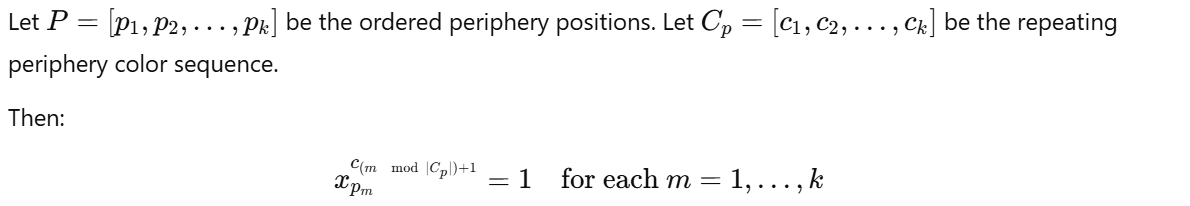

by this we ensures the periphery follows the user-defined repeating color pattern

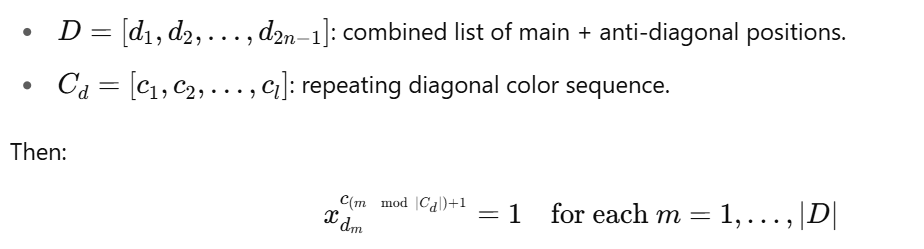

this wraps through the diagonal color pattern

for example , if the pattern length is 3 for both diagonal and pattern then we define:

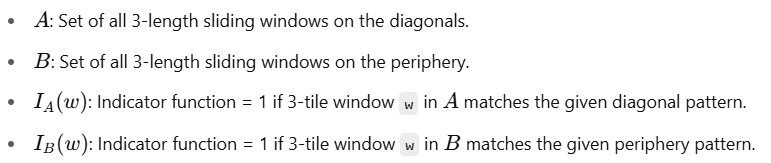

#Objective Function:


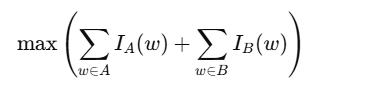

**Diagonal Color Assignment**

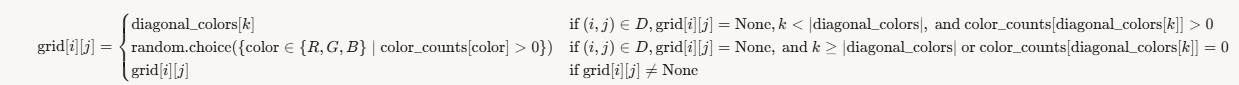

we gave default priority to diagonal over periphery on overlapping postions.

for getting the optimal inital sample (that maximise above objective function) to reduce the time complexity and burn in samples for sampling method:

we start with the diagonals (both the main and anti-diagonal), where colors follow a repeating pattern defined by the user. Next, the outer boundary or periphery of the grid is filled using another user-defined color sequence. After filling these special regions, any remaining empty cells inside the grid are filled randomly with the remaining colors to ensure that all tiles are used up.

In [ ]:
import random

def fill_grid_combined(dimension, red, green, blue, periphery_colors=None, diagonal_colors=None):
    total_cells = dimension * dimension
    if red + green + blue != total_cells:
        print(f"Error: The sum of tiles must equal {total_cells} (dimension²). Please try again.")
        return None

    grid = [[None] * dimension for _ in range(dimension)]
    color_counts = {'R': red, 'G': green, 'B': blue}
    all_colors = ['R', 'G', 'B']

    periphery_positions = []
    for j in range(dimension):
        periphery_positions.append((0, j))
    for i in range(1, dimension):
        periphery_positions.append((i, dimension - 1))
    for j in range(dimension - 2, -1, -1):
        periphery_positions.append((dimension - 1, j))
    for i in range(dimension - 2, 0, -1):
        periphery_positions.append((i, 0))

    main_diagonal = [(i, i) for i in range(dimension)]
    anti_diagonal = [(i, dimension - 1 - i) for i in range(dimension)]
    all_diagonal_positions = main_diagonal + anti_diagonal

    diagonal_index = 0
    for pos in all_diagonal_positions:
        i, j = pos
        if grid[i][j] is not None:
            continue
        if diagonal_colors and diagonal_index < len(diagonal_colors) and color_counts[diagonal_colors[diagonal_index]] > 0:
            grid[i][j] = diagonal_colors[diagonal_index]
            color_counts[diagonal_colors[diagonal_index]] -= 1
        else:
            # Randomly select from available colors with remaining count
            available_colors = [color for color in all_colors if color_counts[color] > 0]
            if available_colors:
                chosen_color = random.choice(available_colors)
                grid[i][j] = chosen_color
                color_counts[chosen_color] -= 1
        diagonal_index = (diagonal_index + 1) % len(diagonal_colors) if diagonal_colors else 0

    periphery_index = 0
    for pos in periphery_positions:
        i, j = pos
        if grid[i][j] is not None:
            continue
        if periphery_colors and periphery_index < len(periphery_colors) and color_counts[periphery_colors[periphery_index]] > 0:
            grid[i][j] = periphery_colors[periphery_index]
            color_counts[periphery_colors[periphery_index]] -= 1
        else:
            # Randomly select from available colors with remaining count
            available_colors = [color for color in all_colors if color_counts[color] > 0]
            if available_colors:
                chosen_color = random.choice(available_colors)
                grid[i][j] = chosen_color
                color_counts[chosen_color] -= 1
        periphery_index = (periphery_index + 1) % len(periphery_colors) if periphery_colors else 0

    empty_positions = [(i, j) for i in range(dimension) for j in range(dimension) if grid[i][j] is None]
    random.shuffle(empty_positions)

    remaining_colors = []
    for color, count in color_counts.items():
        remaining_colors.extend([color] * count)
    random.shuffle(remaining_colors)

    for i, (x, y) in enumerate(empty_positions):
        grid[x][y] = remaining_colors[i]

    return grid


dimension = int(input("Enter the dimension of the square grid: "))
total_cells = dimension * dimension

red = int(input("Enter the number of red tiles: "))
green = int(input("Enter the number of green tiles: "))
blue = int(input("Enter the number of blue tiles: "))

periphery_colors = input("Enter the color pattern for the periphery in order (R/G/B, e.g., R G B): ").strip().upper().split()
diagonal_colors = input("Enter the color pattern for the diagonal in order (R/G/B, e.g., R G B): ").strip().upper().split()

grid = fill_grid_combined(dimension, red, green, blue, periphery_colors, diagonal_colors)

for row in grid:
    print(" ".join(row))

Enter the dimension of the square grid: 8
Enter the number of red tiles: 30
Enter the number of green tiles: 15
Enter the number of blue tiles: 19
Enter the color pattern for the periphery in order (R/G/B, e.g., R G B): G
Enter the color pattern for the diagonal in order (R/G/B, e.g., R G B): B
B G G G G G G B
R B R R R R B G
R R B R R B R G
R R R B B R R G
R R R B B R R G
R R B R R B R G
B B R R R R B G
B B R B G G G B


.






































.















































.














.





















.


















.

















.
















.






































.















































.














.





















.


















.

















.


















# Diagonal & Adjacency Constraint

Diagonal Preference Constraint:

image.png

image.png

prioritize assigning these colors to the diagonal



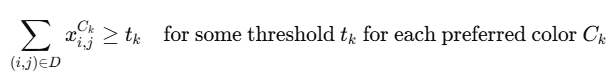

we maximize the alignment of tiles to the diagonal color preferences and minimize adjacency violations.


𝑤𝑑: weight for diagonal coloring preference.

𝑤𝑎: weight for adjacency satisfaction.

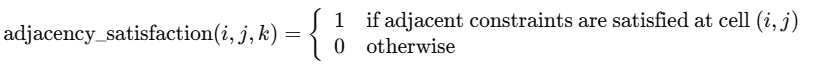

# Objective Function:



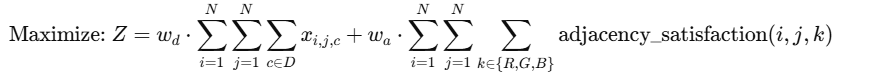

In [ ]:


import random

def generate_colored_grid(dimension, red, green, blue, diagonal_colors, adjacent_tiles):
    def fill_grid():
        total_cells = dimension * dimension
        total_colors = red + green + blue

        if total_colors != total_cells:
            print("Error: Incorrect number of colors.")
            return None

        color_counts.update({'R': red, 'G': green, 'B': blue})
        main_diagonal = [(i, i) for i in range(dimension)]
        anti_diagonal = [(i, dimension - 1 - i) for i in range(dimension)]
        all_diagonal_positions = list(dict.fromkeys(main_diagonal + anti_diagonal))
        random.shuffle(all_diagonal_positions)

        for i, j in all_diagonal_positions:
            filled = False
            for priority_color in diagonal_colors:
                if color_counts[priority_color] > 0:
                    grid[i][j] = priority_color
                    color_counts[priority_color] -= 1
                    filled = True
                    break

            if not filled:
                available_colors = [c for c in 'RGB' if color_counts[c] > 0]
                random.shuffle(available_colors)
                for color in available_colors:
                    if color_counts[color] > 0:
                        grid[i][j] = color
                        color_counts[color] -= 1
                        break

    def violates_adjacency(row, col, tile):
        adjacent_positions = [(row - 1, col), (row + 1, col), (row, col - 1), (row, col + 1)]
        other_colors = {'R', 'G', 'B'} - set(adjacent_tiles)
        same_adjacent_count = 0

        for r, c in adjacent_positions:
            if 0 <= r < dimension and 0 <= c < dimension:
                if grid[r][c] == tile:
                    return True
                if grid[r][c] in other_colors:
                    same_adjacent_count += 1

        return same_adjacent_count >= 2

    def fill_with_adjacency():
        tile1, tile2 = sorted(adjacent_tiles, key=lambda x: color_counts[x])
        tile1_positions = []
        empty_positions = [(i, j) for i in range(dimension) for j in range(dimension) if grid[i][j] is None]
        random.shuffle(empty_positions)

        for i, j in empty_positions[:]:
            if color_counts[tile1] > 0 and not violates_adjacency(i, j, tile1):
                grid[i][j] = tile1
                color_counts[tile1] -= 1
                tile1_positions.append((i, j))
                empty_positions.remove((i, j))
                adjacent_positions = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
                random.shuffle(adjacent_positions)

                for ai, aj in adjacent_positions:
                    if (0 <= ai < dimension and 0 <= aj < dimension and grid[ai][aj] is None and color_counts[tile2] > 0):
                        grid[ai][aj] = tile2
                        color_counts[tile2] -= 1
                        empty_positions.remove((ai, aj))

        for i, j in tile1_positions:
            diagonal_positions = [(i-1, j-1), (i-1, j+1), (i+1, j-1), (i+1, j+1)]
            for di, dj in diagonal_positions:
                if (0 <= di < dimension and 0 <= dj < dimension and grid[di][dj] is None and color_counts[tile1] > 0):
                    grid[di][dj] = tile1
                    color_counts[tile1] -= 1
                    empty_positions.remove((di, dj))
                    if color_counts[tile1] == 0:
                        break
            if color_counts[tile1] == 0:
                break

        remaining_tiles = [tile for tile, count in color_counts.items() for _ in range(count)]
        random.shuffle(remaining_tiles)

        for i, j in empty_positions:
            if remaining_tiles:
                grid[i][j] = remaining_tiles.pop()

    grid = [[None] * dimension for _ in range(dimension)]
    color_counts = {}

    fill_grid()
    if None in [tile for row in grid for tile in row]:
        fill_with_adjacency()

    return grid

# Take input outside the function
dimension = int(input("Enter the dimension: "))
red = int(input("Enter the number of red tiles: "))
green = int(input("Enter the number of green tiles: "))
blue = int(input("Enter the number of blue tiles: "))
diagonal_colors = input("Enter the colors for the diagonal in order (R G B): ").strip().upper().split()
adjacent_tiles = input("Enter two tiles for adjacency constraint (e.g., R G): ").strip().upper().split()

# Run the function
grid = generate_colored_grid(dimension, red, green, blue, diagonal_colors, adjacent_tiles)
for row in grid:
    print(" ".join(row))

Enter the dimension: 8
Enter the number of red tiles: 23
Enter the number of green tiles: 16
Enter the number of blue tiles: 25
Enter the colors for the diagonal in order (R G B): G
Enter two tiles for adjacency constraint (e.g., R G): B R
G B R B B R B G
B G B B R B G R
R B G R B G R R
B R B G G R B R
R B R G G B R B
R R G B R G B R
R G B R R B G B
G B R B B R B G
